# 1. Descripción del problema

Los algoritmos de ordenamiento son un problema en área de la informática, a lo largo de los años la busqueda de distintos algoritmos o funciones que sean eficientes se ha mantenido constante, entre ellos está **QuickSort**.
El algoritmo QuickSort es algo diferente a otros metodos de ordenamiento, ya que depende bastante de su implementación y el orden de los elementos de entrada de cuan eficiente puede llegar a ser.


# 2. Descripción del algoritmo

**Entrada:** Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida:** Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$ de tal manera que $[a_1'\leq a_2'\leq...\leq a_n']$

El algoritmo **QuickSort** recibe de entrada una secuencia de números y los retorna de menor a mayor. Este algoritmo utiliza el paradigma de **divide y vencerás**, en el que dividiremos nuestro problema de entrada en instancias más pequeñas del mismo problema.

El funcionamiento general del algoritmo se basa en dos funciones. Una de ellas **quickSort** propiamente tal y otra función llamada **partition**, que es la más importante.

Para la compresion de estas funciones definiremos las siguientes variables.

1. **«A»** corresponde a nuestro arreglo de entrada.
2. **«r»** corresponde a nuestro índice final del arreglo.
3. **«p»** corresponde a nuestro índice inicial del arreglo. Esta variable aumentará hasta que sea igual a **r**.« »
4. **«q»** corresponde a nuestra mitad o pivote del arreglo.

## 2.1 Función partition

La función básicamente consistirá en dividir el arreglo en dos subarreglos y ordenarlos de una manera determinada. Tendremos $A[p..q-1]$ y $A[q+1..r]$ de manera que todos los elementos a la izquierda del arreglo, es decir, $A[p..q-1]$ sean menor o igual a **q**. Mientras que los elementos a la derecha, $A[q+1..r]$ son mayores o iguales a **q**.

Tomaremos dos variables **i** y **j**. Se recorrerá el arreglo desde el índice **p** hasta el índice $r-1$. En esta ocasión se utilizará como pivote el último elemento del arreglo, de la forma x = A[r] (Se pueden utilizar como pivote otros elementos del arreglo, como se mostrará en la implementación). La función deja cuatro «secciones» en el arreglo satisfaciendo propiedades como se muestra en la imagen:

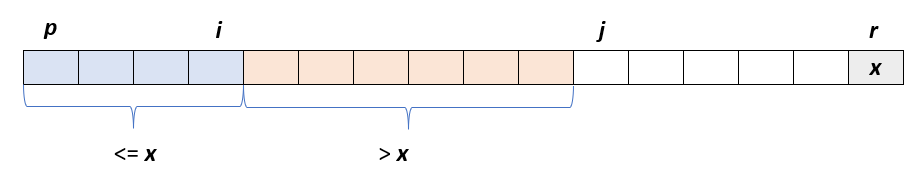

Cuando realizamos iteraciones se realizan las siguientes comparacione:
1. Comparamos el elemento $A[j]$ con nuestro pivote $A[r]$. Si $A[j]$ es menor o igual a $A[r]$ realizamos un cambio entre $A[j]$ y $A[i+1]$. Aumentamos el valor de **i**.

2. En cada iteración aumentamos el valor de **j**

3. Al final del bucle realizamos un intercambio entre A[i+1] y A[r]. Luego retornamos **q = i + 1**, que vendría siendo nuestro elemento medio del arreglo.




##2.2 Función quickSort

La función se llama a si misma de manera recursiva para ordernar los arreglos $A[p..q-1]$ y $A[q+1..r]$.


En el subarreglo de la izquierda tendremos elementos de la forma $A[p..q-1]$ $ \leqq $ $A[q]$ y por el subarreglo derecho elementos de la forma $A[q]$ $>$ $A[q+1..r]$

# 3. QuickSort

## 3.1 Partition (pivote al final)

In [773]:
import random
import copy
from termcolor import colored

def partitionFinal(A,p,r,verbose):
  global comp
  #Definimos nuestro pivote al final del arreglo
  pivote = A[r]
  sorted = False
  i = p - 1
  j = p

  

  #Realizamos iteraciones hasta que j == r
  while (j != r):
    comp += 1

    if verbose == True and sorted == False:
        print("ciclo",j+1,"",colored(str(A[:j])[1:-1]),str(A[j:r])[1:-1],",",colored(str(A[r:r+1])[1:-1],"green"))
        #print("ciclo",j+1,"",colored(str(A[:j])[1:-1],"red"),str(A[j:r])[1:-1],",",colored(str(A[r:r+1])[1:-1],"green"))
    elif verbose == True and sorted == True:
        print("ciclo",j+1,"",colored(str(A[:j])[1:-1],"red"),colored(str(A[j:r])[1:-1],"blue"),",",colored(str(A[r:r+1])[1:-1],"green"))

    if (A[j] <= pivote):
      if (A[j] > pivote):sorted = True
      i += 1
      #Intercambiamos A[i] con A[j]
      aux = A[i]
      A[i] = A[j]
      A[j] = aux
      
    j += 1
  
  #Intercambiamos A[i+1] con A[r]
  aux = A[i+1]
  A[i+1] = A[r]
  A[r] = aux
  if verbose == True:
    print("Intercambio: ",colored(str(A[:i+1]),"red"),colored(str(A[i+1]),"green"),colored(str(A[i+2:r+1]),"blue"))
    print()
  #retornamos "q"
  return i+1


def quickSortFinal(A,p,r,verbose):
  if p < r:
    q = partitionFinal(A,p,r,verbose)

    quickSortFinal(A,p,q-1,verbose)
    quickSortFinal(A,q+1,r,verbose)

A = random.sample(range(1,20),5)
#A = [9, -3, 5, 2, 6, 8, -6, 1, 3]
global comp
comp = 0
print("Input array: ",A)
p = 0
r = len(A)-1
verbose = False
quickSortFinal(A,p,r,verbose)
print("Output array: ",A)
print("Comparaciones: ",comp)

Input array:  [9, 8, 11, 16, 2]
Output array:  [2, 8, 9, 11, 16]
Comparaciones:  8


##3.2 Partition (pivote al ínicio)

In [806]:
import random

def partitionInicio(A,p,r):
  global comp
  #Definimos nuestro pivote al inicio del arreglo
  pivote = A[p]

  i = r+1
  j = r

  #Realizamos iteraciones hasta que j == r
  while (j != p):
    comp += 1
    if (A[j] >= pivote):
      i -= 1
      #Intercambiamos A[i] con A[j]
      aux = A[i]
      A[i] = A[j]
      A[j] = aux
    j -= 1
  
  #Intercambiamos A[i-1] con A[r]
  aux = A[i-1]
  A[i-1] = A[p]
  A[p] = aux

  #retornamos "q"
  return i-1


def quickSortInicio(A,p,r):
  if p < r:
    q = partitionInicio(A,p,r)
    quickSortInicio(A,p,q-1)
    quickSortInicio(A,q+1,r)

#A = [13,19,9,5,12,8,7,4,21,2,6,11]
A = random.sample(range(1,20),5)
global comp
comp = 0
print("Input array: ",A)
p = 0
r = len(A)-1
quickSortInicio(A,p,r)
print("Output array: ",A)
print("Comparaciones: ",comp)

Input array:  [17, 2, 13, 16, 15]
Output array:  [2, 13, 15, 16, 17]
Comparaciones:  8


## 3.3 Partition (pivote en la mediada de tres elementos)

In [817]:
import random

#obtener la mediana
def mediana(num_uno,num_dos,num_tres, A):
    if A[num_uno] >= A[num_dos] and A[num_uno] <= A[num_tres]:
            return num_uno
    elif A[num_dos] >= A[num_uno] and A[num_dos] <= A[num_tres]:
            return num_dos
    return num_tres

def partitionMedio(A,p,r):
  global comp
  i1 = random.randrange(p, r)
  i2 = random.randrange(p, r)
  i3 = random.randrange(p, r)
  
  indiceMed = mediana(i1,i2,i3,A)
  #Swap
  (A[indiceMed],A[r]) = (A[r],A[indiceMed])
  pivote = A[r]

  i = p - 1

  #Entro en el ciclo de intercambios
  for j in range(p,r):
    comp+=1
    if A[j] <= pivote:
      i = i + 1
      (A[j],A[i]) = (A[i],A[j])

  (A[i+1], A[r]) = (A[r],A[i+1])


  return i+1

def quickSortMedio(A,p,r):
  if p < r:
    q = partitionMedio(A,p,r)
    quickSortMedio(A,p,q-1)
    quickSortMedio(A,q+1,r)

#A = [13,19,9,5,12,8,7,4,21,2,6,11]
A = random.sample(range(1,10),5)
global comp
comp = 0
print("Input array: ",A)
p = 0
r = len(A)-1
quickSortMedio(A,p,r)
print("Output array: ",A)
print("Comparaciones: ",comp)

Input array:  [6, 7, 1, 3, 2]
Output array:  [1, 2, 3, 6, 7]
Comparaciones:  7


## 3.4 verbose == `True`

In [791]:
import random
A = random.sample(range(1,10),6)
#A =  [1,3,2,7,8,9,5]
print("input array: ",A,"\n")

quickSortFinal(A,0,len(A)-1,verbose = True)

print("\noutput array: ",A)


input array:  [6, 8, 2, 3, 9, 7] 

ciclo 1   6, 8, 2, 3, 9 , 7
ciclo 2  6 8, 2, 3, 9 , 7
ciclo 3  6, 8 2, 3, 9 , 7
ciclo 4  6, 2, 8 3, 9 , 7
ciclo 5  6, 2, 3, 8 9 , 7
Intercambio:  [6, 2, 3] 7 [9, 8]

ciclo 1   6, 2 , 3
ciclo 2  6 2 , 3
Intercambio:  [2] 3 [6]

ciclo 5  2, 3, 6, 7 9 , 8
Intercambio:  [2, 3, 6, 7] 8 [9]


output array:  [2, 3, 6, 7, 8, 9]


El color rojo corresponde a los valores menores al pivote, el color verde al pivote y el color azul a los valores mayores al pivote.

#4. Tiempo de ejecución

**QuickSort** posee distintos tiempos de ejecución dependiendo de diferentes casos teóricos. El mejor caso y el caso promedio poseen una misma complejidad temporal, sin embargo, el peor caso teórico es diferente. Para poder observar las distintas complejidades veamos las siguientes imágenes:

## 4.1 Peor caso teórico

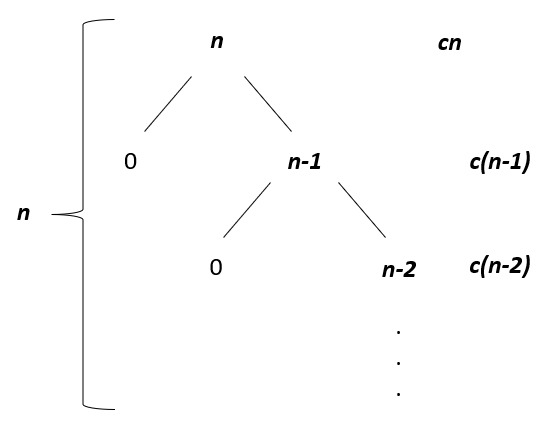

El peor caso ocurre cuando obtenemos las particiones mas desbalanceades posibles. Entonces la llamada original de la función se realiza en un tiempo de $cn$, siendo $c$ una constante. En las llamada recursiva $n-1$ tendremos un tiempo de $c(n-1)$, en la llamada recursiva $n-2$ tendremos un tiempo de $c(n-2)$ y así con los demás niveles del árbol de recursión.

En base al árbol podemos obtener la siguiente sumatoria:

\begin{align}
        \sum_{i=1}^n c(n-i).
    \end{align}

Entonces podemos expresar la forma $(n-i)*n$ que nos da $n^2 - n*i$.
El componente de mayor crecimiento es $n^2$, lo que nos da una comlejidad de $O(n^2)$

## 4.2 Mejor caso
El mejor caso ocurre cuando las particiones se realizan de la manera más balanceada posible. El árbol recursivo nos quedaría así:

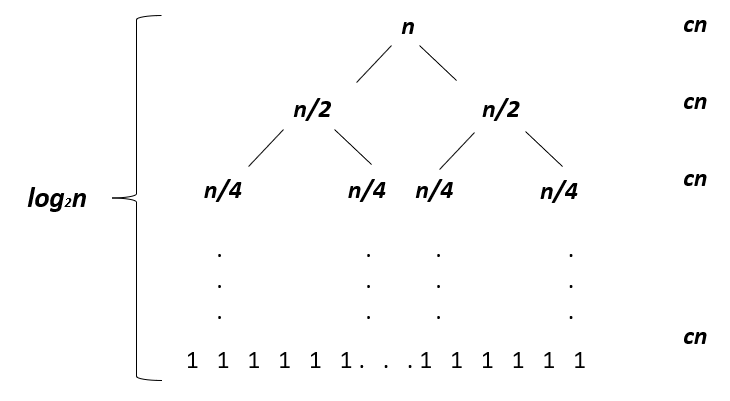

En base al árbol podemos obtener la siguiente sumatoria:

\begin{align}
        \sum_{i=0}^{\log_2n}cn.
    \end{align}

Entonces podemos expresar la forma $n(\log_2 n + 1)$. Nos queda $n * \log_2 n + n$. El componente de mayor crecimiento corresponde a $n * \log_2 n$. Lo que nos da una complidad de $O(n \log_2n)$

## 4.3 Caso promedio


Para analizar el caso promedio del algoritmo lo ideal sería una analisis matemático riguroso, sin embargo tambien se puede tener obtener la complejidad $O(n \log_2 n)$ de manera intuitiva observando otro árbol de recursión.

Para entender esto supongamos que tenemos una razón de 3 a 1 de partes balanceadas, es decir, cada vez que hacemos una partición un lado tiene $3n/4$ elementos y el otro lado tiene $n/4$ elementos. Entonces pensemos en un árbol que en la mitad de las veces tenemos una division de 3 a 1 y en la otra mitad el peor caso de la división. Estos dos casos se van alternando. El árbol tiene $n$ elementos en el subarreglo, entonces nos quedaría así.

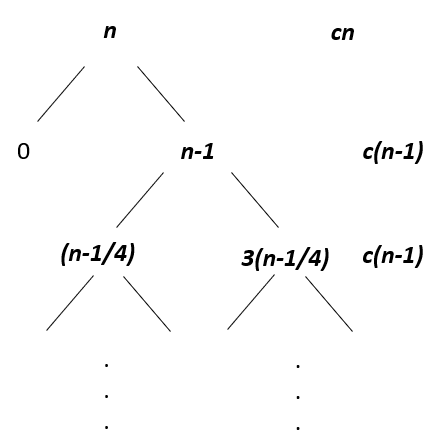

Con esto en mente, si la mitad de las veces tenemos el peor caso de la división y la otra mitad una división de 3 a 1, el tiempo de ejecución correspondería más o menos al doble del tiempo de ejecución de siempre obtener una división de 3 a 1.

#5. Correctitud






##5.1 Función Partition


**Teorema**

La función Partition recibre un arreglo  de la forma $A[p..r]$, lo reorganiza y retorna un índice $q$ de manera que los elementos del arreglo $A[p..q-1]$ son menores o iguales a $A[q]$ y los elementos del arreglo $A[q+1..r]$ son mayores a $A[q]$.

Para probar este teorema utilizaremos la propiedad invariante de bucle.

**Inicialización:** Si tomamos una variable $k$, se cumple que para cualquier índice:

$p \leq k \leq i$   entonces   $A[k] \leq A[r]$


$i < k < j$   entonces   $A[k] > A[r]$

Antes del primer bucle se estrablece que $i = p - 1$ y $j = p$, por lo que no hay valores entre $p$ e $i$ ni valores entre $i + 1$ y $j - 1$ entonces las dos condiciones son trivialmente verdaderas.

**Mantención:** Si $A[j] > x$, entonces $j$ se incrementa. Se mantiene la segunda condición. Si $A[j] \leq x$ se incrementa $i$, se intercambia $A[i]$ con $A[j]$ y luego se incrementa $j$. Por el intercambio ahora tenemos que $A[i] \leq x$, por lo que la segunda condición se satisface.




##5.2.- Función QuickSort

**Inducción matemática**

Para probar la correctitud, utilizaremos el metodo de inducción matemática, básicamente consisten en que si queremos probar alguna declaración $P(n)$ debemos probar un par de condiciones.

1. Probar un caso base para $P(n)$ como $P(1)$
2. Probar que si $P(m)$ es verdad para m < n, entonces P(n) también lo es.

Probaremos un caso base para el **quickSort**, como sabemos, el algoritmo toma **n** elementos de entrada y los retorna de manera ordenada de menor a mayor. Entonces, podemos tomar $P(1)$ cuando **n** = 1. De esta forma cuando el arreglo solo tiene un elemento, ya está ordenado. por lo tanto, $P(1)$ es verdad.

Para el otro caso, también sabemos que el algoritmo divide dos veces el arreglo de tamaño **n** en subarreglos. Tenemos que `m = n/2` y `m = n/2` en la **primera división**. Entonces como m es menor a n, comprobamos que el caso inductivo también es verdad.

Al cumplir estos dos puntos, entonces **quickSort** es correcto.


# 6. Experimentos



## 6.1 Comparaciones

Observaremos la cantidad de comparaciones que realiza el algoritmo en dos casos teóricos:

* Peor caso teórico $O(n^2)$ 
* Mejor caso teórico $O(n \log_2 n)$ 

Estableceremos un tamaño del problema de $n \in [5,74]$. El arreglo de entrada tendrá números entre 1 y 100. **Ya ordenados de menor a mayor**

In [217]:
import matplotlib.pyplot as plt
import random
import math
for n in range(5,25):
  a = random.sample(range(1, 100), n)
a.sort()

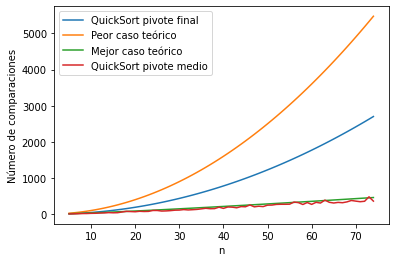

In [838]:
import matplotlib.pyplot as plt
import random
import math

x = [n for n in range (5,75)]
y = []
z = []

# Peor y mejor caso
y1 = [pow(n,2) for n in range (5,75)] 
y2 = [n * math.log2(n) for n in range (5,75)]


for n in range(5,75):
  global comp
  comp = 0
  verbose = False
  a = random.sample(range(1, 100), n)
  a.sort()
  quickSortFinal(a,0,len(a)-1,verbose)
  y.append(comp)
  comp = 0
  quickSortMedio(a,0,len(a)-1)
  z.append(comp)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,z)
plt.legend(["QuickSort pivote final", "Peor caso teórico", "Mejor caso teórico","QuickSort pivote medio"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

Como podemos observar el número de comparaciones de **QuickSort** con el pivote medio se asemeja al mejor caso teórico, esto se debe a que como el arreglo ya se encuentra ordenado, para el modelo **QuickSort** con el pivote medio debe realizar un númnero mucho menor de comparaciones, debido al menor número de intercambios que debe realizar.

## 5.2 QuickSort vs MergeSort

### 5.2 MergeSort vs InsertionSort

Compararemos los algoritmos **MergeSort** e **InsertionSort**.

Estableceremos un tamaño del problema de $n \in [5,249]$. El arreglo de entrada tendrá números entre 1 y 500

**MergeSort:**

In [172]:
# ALGORITMO MERGESORT

# p = inicio(indice) ; r = tamaño(indice) ; q = mitad(indice)

def merge(A,p,q,r,verbose):

  #global comp
  #Sub-arreglos 
  arregloIzq = A[p:q+1]
  arregloDer = A[q+1:r+1]

  indiceIzq = 0      #Índice sub-arreglo izquierdo
  indiceDer = 0      #Índice sub-arreglo derecho

  
  if verbose == True:
      print("")
      print(A[p:q+1],A[q+1:r+1])
  #ciclo para recorrer arreglo principal
  for k in range(p,r+1):
    
    #Copiar sobras de sub-arreglos en el arreglo principal
    if indiceDer == len(arregloDer):
      for k in range(k,r+1):
        A[k] = arregloIzq[indiceIzq]
        #comp += 1 
        indiceIzq += 1
      break

    if indiceIzq == len(arregloIzq):
      for k in range(k,r+1):
        A[k] = arregloDer[indiceDer]
        #comp += 1 
        indiceDer += 1
      break

    #Comparar sub-arreglos y dejar el menor elemento en el arreglo principal
    #comp += 1  #contador comparaciones
    if (arregloIzq[indiceIzq] <= arregloDer[indiceDer]):
      A[k] = arregloIzq[indiceIzq]
      indiceIzq += 1
    else:
      A[k] = arregloDer[indiceDer]
      indiceDer += 1
    if verbose == True and arregloIzq[indiceIzq-1] > arregloDer[indiceDer-1]:
      print("Merge: ",colored(A[p:r+1],"blue"),"   Comparando...","\n")

  if verbose == True:
      print("Merge: ",colored(A[p:r+1],"green"),"  ¡Ordenado!","\n")
    
  
def mergeSort(A,p,r,comparacion,verbose):
  
  #global comp,contRe
  #contRe += 1

  if p == r: return #Cuando el arreglo solo tiene un elemento lo retorna
  
  q = int((p+r)/2)  #Medio del arreglo

  if verbose == True:
    print("¡MergeSort! ",colored(A[p:q+1],"red"),colored(A[q+1:r+1],"red"))
   
  mergeSort(A,p,q,comparacion,verbose)  #Ordenar sub-arreglo izquierdo  

  mergeSort(A,q+1,r,comparacion,verbose)#Ordenar sub-arreglo derecho
  
  merge(A,p,q,r,verbose)    #Combinar los dos sub-arreglos

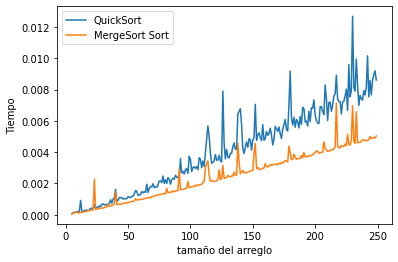

In [822]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]
ix=[]; by=[]


for n in range(5,250):
  comp = 0
  verbose = False
  p = 0
  a = random.sample(range(1, 250), n)
  r = len(a)-1
  q = int((p+r)/2)

  z = repeat(setup="from __main__ import quickSortFinal", stmt=f"quickSortFinal({a},{p},{r},{verbose})", repeat=1, number=10)

  ix.append(n)
  by.append(z)


  t = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{p},{q},{r},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(ix,by)

plt.plot(x,y)


plt.legend(["QuickSort","MergeSort Sort"])


plt.xlabel('tamaño del arreglo')
plt.ylabel('Tiempo')
plt.show()

Como podemos apreciar, ambos algoritmos en lo que respecta a tiempo de ejecución son muy similares, esto se debe a que poseen igual complejidad temporal en el caso promedio $O(n \log n)$

## 5.3 Rendimiento con distintos pivotes

A continuación veremos el rendimiento que tiene el algoritmo **QuickSort** dependiendo del lugar en donde pongamos nuestro pivote. Ya sea al inicio, el final, o en la mediana de tres elementos aleatorios del arreglo.

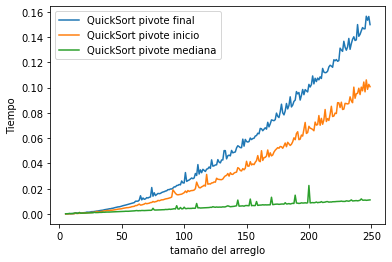

In [828]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]
ix=[]; by=[]
Ax=[]; By=[]


for n in range(5,250):
  comp = 0
  verbose = False
  p = 0
  a = random.sample(range(1, 500), n)
  a.sort()
  r = len(a)-1
  q = int((p+r)/2)


  z = repeat(setup="from __main__ import quickSortFinal", stmt=f"quickSortFinal({a},{p},{r},{verbose})", repeat=1, number=10)

  ix.append(n)
  by.append(z)


  t = repeat(setup="from __main__ import quickSortInicio", stmt=f"quickSortInicio({a},{p},{r})", repeat=1, number=10)
  x.append(n)
  y.append(t)

  f = repeat(setup="from __main__ import quickSortMedio", stmt=f"quickSortMedio({a},{p},{r})", repeat=1, number=10)

  Ax.append(n)
  By.append(f)

plt.plot(ix,by)

plt.plot(x,y)

plt.plot(Ax,By)


plt.legend(["QuickSort pivote final","QuickSort pivote inicio","QuickSort pivote mediana"])


plt.xlabel('tamaño del arreglo')
plt.ylabel('Tiempo')
plt.show()

Como podemos apreciar dependiendo de la implementación de la función **partition** el rendimiento del algoritmo **QuickSort** cambia drasticamente. Si nuestro arreglo de entrada ya se encuentra ordenado el algoritmo tiene un desempeño no muy optimo si se escoje un pivote al inicio o al final del arreglo. Por ese motivo utilizar la llamada "mediana de tres" es la forma más eficiente de implementar el algoritmo.